# Fourier Transfrom - A Visual Introduction

<ul>
<li><b>This notebook is based on this amazing video by 3Blue1Brown, explaining the quite widely ungrasped topic of Fourier Transform, in a very intuitive, visually stimulating and satisfying way.</b></li>
<li>This notebook implements the method explained in the video, the center of the mass idea, along with plotting various graphs that pop up on our way.</li>
<li>Highly popular Python libraries Numpy and Matplotlib were used.

In [1]:
from IPython.display import HTML
HTML('<iframe width="950" height="520" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="1" allowfullscreen></iframe>')

# 1. Generating the signal
We will be using a cosine wave of 3 Hz frequency, as the input signal

In [2]:
import matplotlib.pyplot as plt
import numpy as np

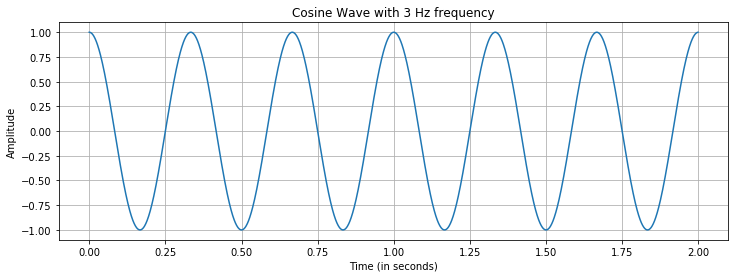

In [3]:
f = 3.0
t = [i for i in np.arange(0,2,0.001)] 
# cos_wave = [2*m.cos(2*np.pi*f*i) + 5*m.cos(2*np.pi*f*2*i) for i in t]
cos_wave = [np.cos(2*np.pi*f*i) for i in t]
plt.rcParams["figure.figsize"] = (12,4)
plt.title("Cosine Wave with 3 Hz frequency")
plt.plot(t,cos_wave)
plt.ylabel("Amplitude")
plt.xlabel('Time (in seconds)')
plt.grid()

# 2. Warping the input signal wave around

Just to summarise the idea put forth in the video, we need to try warping the input signal graph for a number of sampling frequencies and then by keeping the track of the x-coordinate of the center of mass, considering the warped graph as a piece made of metal wire, we can estimate the frequencies present in the input signal.<br>
The range for frequency search is kept here as 0 to 10 Hz.

In [4]:
r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0
sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for sf in sf_list:
    r_cord.append( [(cos_wave[i], t[i]*sf*2*np.pi) for i in range(len(t)) ] )

In [5]:
x_cord , y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp*np.cos(theta) for (amp,theta) in r_cord[l]] )
    y_cord.append( [amp*np.sin(theta) for (amp,theta) in r_cord[l]] )

Below cell plots all the beautiful curves that pop up while doing this for each value of the sampling frequency in our list.<br>
Will take a little bit of time to execute, because the number of plots may be high, and once every plot is made, only then the whole figure pops up.<br>
Totally worth the wait !! The <b>Red dot</b> denotes the Center of Mass of the graph. 

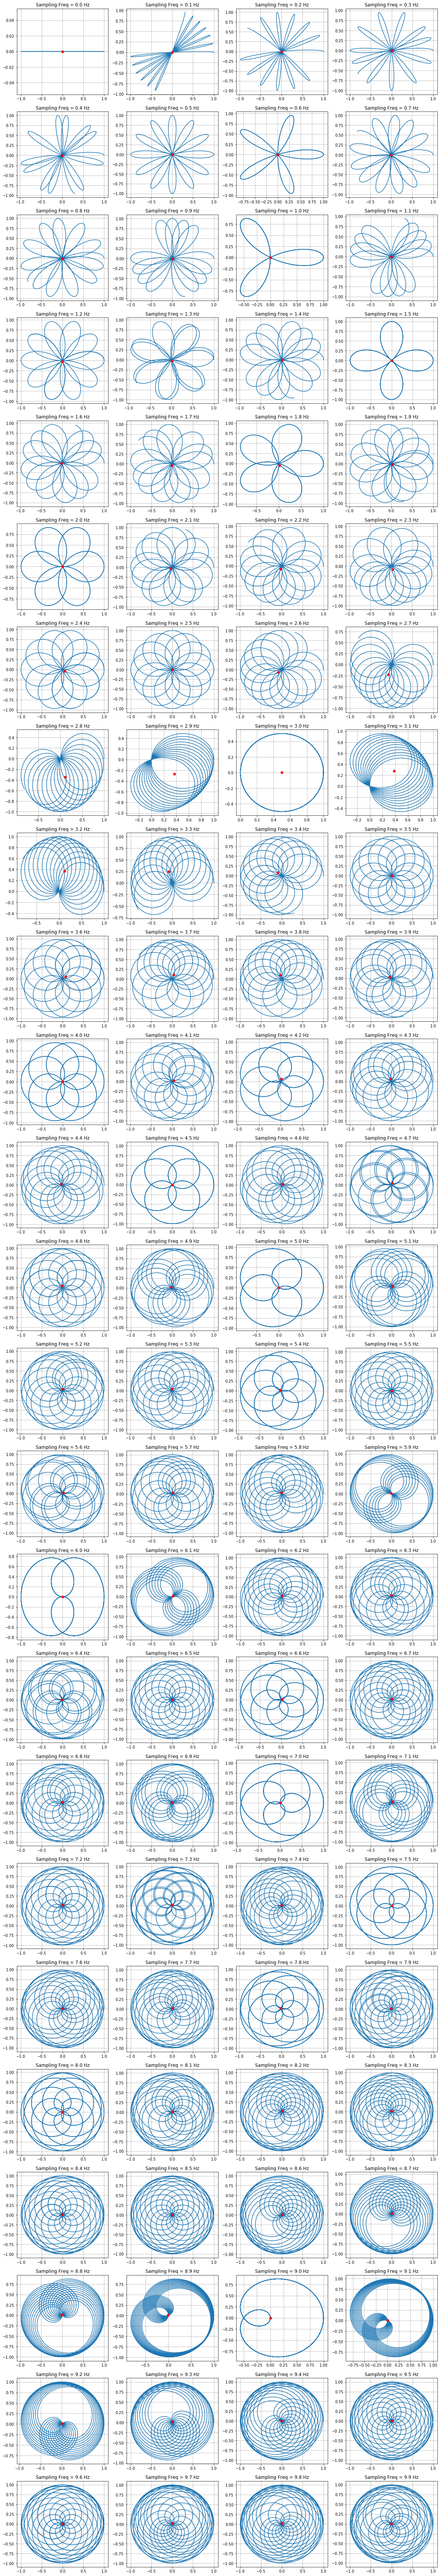

In [6]:
mean_list = []

plt.rcParams["figure.figsize"] = (20,130)
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l])
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or' )
    
    plt.grid()
    plt.title("Sampling Freq = "+str(round(sf_list[l], 2))+" Hz")
    
    # Storing the COM for plotting later
    x_mean = np.sum(x_cord[l])
    mean_list.append(x_mean)

# 3. Plotting COM v/s Sampling Frequency

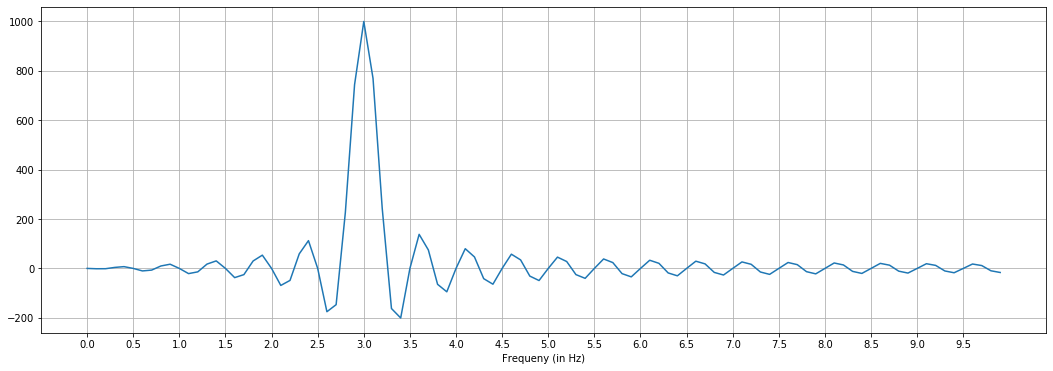

In [7]:
plt.rcParams["figure.figsize"] = (18,6)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.plot(sf_list,mean_list)
plt.grid()

For clear estimation of Frequencies present, we need to smoothen the graph.<br>
Below is the smoothened version of the graph, with a clear peak near around 3 Hz.

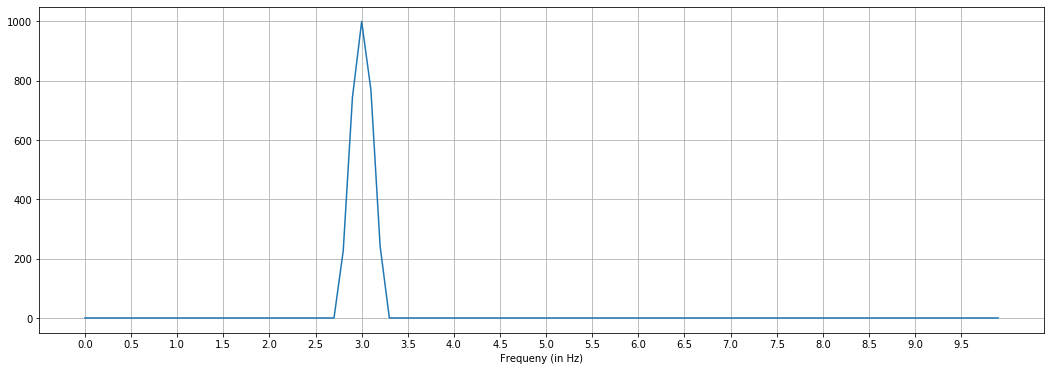

In [8]:
plt.rcParams["figure.figsize"] = (18,6)
smoothed = [i if i>0 and i>0.2*max(mean_list) else 0 for i in mean_list]
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.plot(sf_list, smoothed)
plt.grid()

Plotting the same graph as a Bar chart, as the Frequencies are depicted in a typical Fourier Analysis

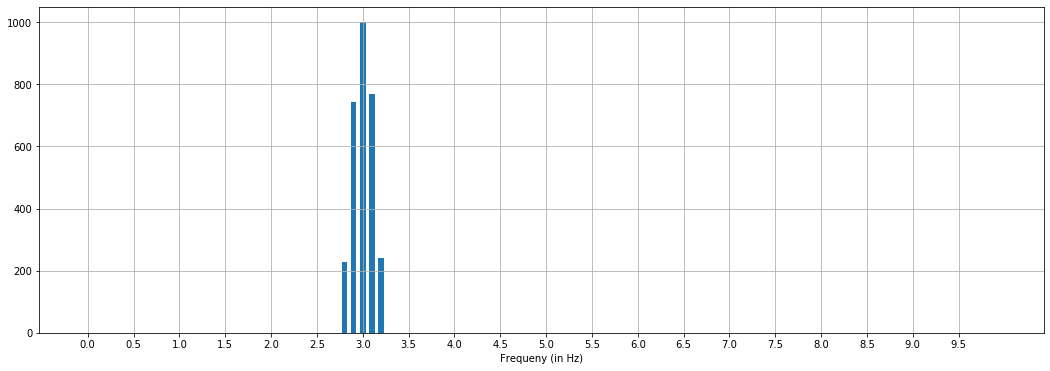

In [9]:
plt.rcParams["figure.figsize"] = (18,6)
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.xlabel("Frequeny (in Hz)")
plt.bar(sf_list, smoothed, width = 0.06)
plt.grid()